### 12. 모수적 모델

### import

In [1]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [np, pd, mpl, sns, sklearn]:
    print(i.__name__, i.__version__)

numpy 1.18.5
pandas 0.25.1
matplotlib 3.5.3
seaborn 0.12.2
sklearn 0.21.3


### 예제 데이터셋 준비

In [2]:
df_abalone = pd.read_csv('data/abalone.csv')
df_abalone.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df_berry = pd.read_csv('data/wild_blueberry.csv', index_col='Row#')
df_berry.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [4]:
df_spam = pd.read_csv('data/SMSSpamCollection.tsv', sep='\t')
df_spam.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 1. 가중치 기반 모델(Weight-Based Model)

- 특성(Feature)에 중요도를 나타내는 가중치를 곱하고 이를 합하여 출력(Output)을 생성하는 구조의 모델
> Ex) 선형회귀 모델
>
> $\hat{𝒚}=𝒇(\mathbf{𝐱})=\mathbf{𝐰}^𝑻\mathbf{𝐱}+𝒃$


#### 인공 신경망

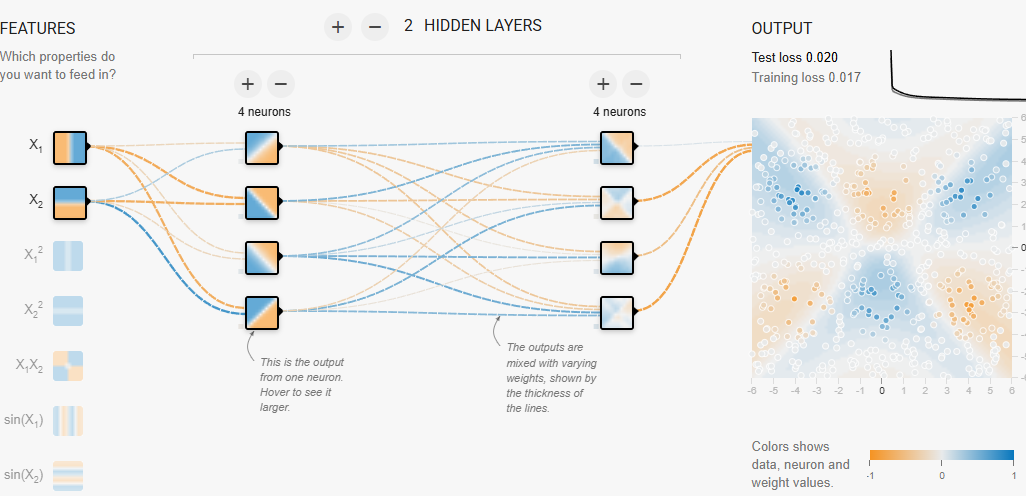

출처 : https://playground.tensorflow.org/

#### 학습
|   | 수식 기반 추정<br/>(Closed-Form Solution Estimation) | 최적화 알고리즘 기반 추정<br/>(Optimization-Based Estimation) |
| --- | --- | --- |
| 기본 개념 | 수식으로 가중치를 직접 계산 | 손실이 감소하는 방향으로 반복적 가중치 갱신 |
| 대표 알고리즘 | 정규 방정식 | 경사 하강법 |
| 장점 | 고정된 결과를 얻을 수 있음 | 높은 범용성<br/>점진적 학습 가능 |
| 단점 | 사용할 수 있는 모델이 제한적임 | 최적화 알고리즘 튜닝 필요<br/>초기값 설정에 따라 성능 차이가 있음 |
| 활용 모델 | 선형회귀 모델, Ridge 회귀 모델, … | 선형회귀 모델, 인공신경망, … |


#### 경사하강법(Gradient Descent)
- 목적 함수의 기울기를 따라 모수를 갱신하는 반복적 최적화 알고리즘
- 반복이 진행됨에 따라 목적 함수가 최적값에 가까워짐

> $\mathbf{\theta}=\mathbf{\theta}−\eta\nabla_{\mathbf{\theta}}𝐽(\theta)$
>
> $J(\mathbf{\theta})$: 목적 함수(Objective Function)
>
> $\eta$: 학습률(Learning Rate)

#### 선형회귀 모델 학습에 경사하강법 적용

$\hat{y}_i = \mathbf{w}^T\mathbf{x}_i + b$

$J = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \longleftarrow \text{MSE를 목적함수로 사용}$

$\nabla_{\mathbf{w}}J = -\frac{2}{N}\sum_{i=1}^{N} \mathbf{x}_i(y_i - \hat{y}_i) = -\frac{2}{N}X^T(\mathbf{y} - \hat{\mathbf{y}}) \quad \frac{\partial J}{\partial b} = -\frac{2}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)$

$\mathbf{w} = \mathbf{w} - \eta\nabla_{\mathbf{w}}J(\mathbf{w})$

$b = b - \eta\frac{\partial J}{\partial b}(b)$

#### 경사하강법(Gradient Descent)의 과정

- 1. 모수 초기화
- 2. 손실과 기울기 계산
- 3. 모수 업데이트
- 4. 종료 조건을 충족 하지 않으면 2단계로 이동

※에폭(Epoch): 학습 데이터를 모두 사용하여 한 번 학습을 완료한 수행 단위


#### 학습률(Learning Rate)
- 적정 수준의 학습을 맞춰 주어야 함
- 너무 크면 불안정, 너무 작으면 느림

> $\mathbf{\theta}=\mathbf{\theta}−\eta\nabla_{\mathbf{\theta}}𝐽(\mathbf{\theta})$


**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

단순 선형 회귀 데이터셋을 만들고, 정규방정식과 경사하강법 학습법을 비교합니다.

</div>

In [5]:
from sklearn.datasets import make_regression

# 예제로 사용할 데이터셋을 만듭니다.
X, y = make_regression(
    n_samples=100, 
    n_features=1,  # 입력 변수는 한 개로 합니다,
    n_informative=1, 
    noise=4.0,
    bias=1.0, 
    random_state=123
)

**정규방정식 (Ordinary Least Square, OLS)**

2차 방정식의 근의 공식이 있듯이, 선형 회귀 모델의 계수를 구하는 것은 공식화 되었습니다. 

이 공식을 바로 정규방정식이라고 합니다.

$\hat{\beta} = (X^T X)^{-1} X^T y$

In [6]:
# Linear Regression의 상수항(beta_hat_0)을 행렬연산에 포함시켜 구하기 위해 모두 1인 입력변수를 추가합니다.
X_1 = np.hstack([X, np.ones((X.shape[0], 1))])
# 처음 5행만 출력합니다.
X_1[:5]

# OLS를 통한 Linear Regression 모델 학습
X_gram = np.dot(X_1.T, X_1)  # X_1^T, X_1 행렬곱을 합니다.
X_gram_inv = np.linalg.inv(X_gram) # X_gram의 역행렬을 구합니다.
beta_hat = np.dot(X_gram_inv, np.dot(X_1.T, y)) # beta_hat을 구합니다.
beta_hat

array([33.9064697 ,  0.96504735])

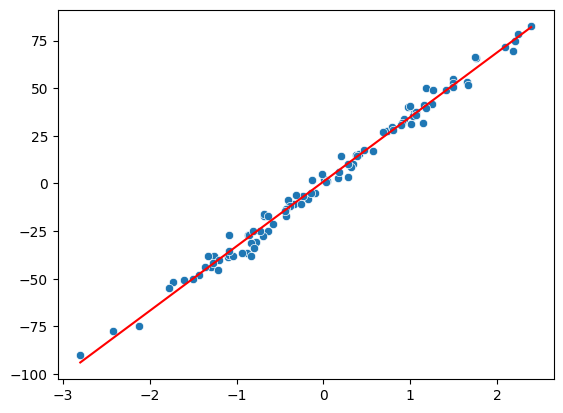

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def linear_reg(X_1, beta_hat):
    """
    학습을 통해 도출한 beta_hat으로 y값 예측합니다.
    """
    return np.dot(X_1, beta_hat)

def plot_linear_model(x_min, x_max, beta_hat, **kwarg):
    """
    beta_hat의 회귀선을 출력합니다.
    """
    x_range = np.array([
        [x_min, 1], 
        [x_max, 1]
    ])
    sns.lineplot(x=x_range[:, 0], y=linear_reg(x_range, beta_hat), **kwarg)
    
sns.scatterplot(x = X[:, 0], y = y)
# 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

**경사하강법(Gradient Descent)**

$\nabla_\mathbf{\beta} J = -\frac{2}{N}\sum_{i=1}^{N} \mathbf{x_i}(y_i - \hat{y}_i) = -\frac{2}{N}\mathbf{X}^T(\mathbf{y} - \mathbf{\hat{y}})$ 

In [8]:

# Step.1

# 초기화: (-1, 1) 사이의 임의의 2개의 실수를 만듭니다.
beta_hat = np.random.uniform(-1, 1, 2)

# Step 2

y_hat = np.dot(X_1, beta_hat)
beta_hat_grad = -2 * np.dot(y - y_hat, X_1) / y.shape[0]
beta_hat_grad

array([-87.50197141,  -2.22839121])

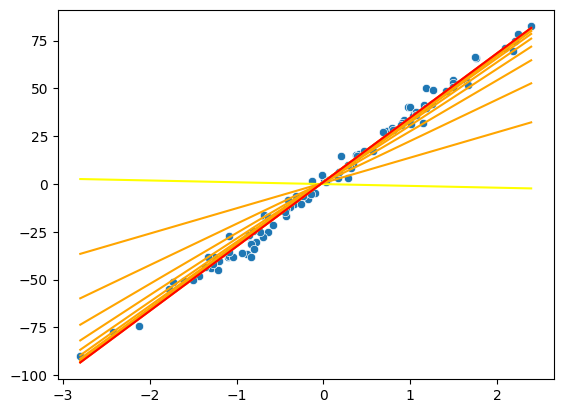

In [9]:
beta_hat = np.random.uniform(-1, 1, 2) #  -1, 1 사이의 임의 수 2개를 생성합니다.
sns.scatterplot(x = X[:, 0], y = y)
# 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='yellow')

learning_rate = 0.02 # 학습율(속도)
# Epoch마다 손실(loss)을 기록하기 위한 리스트
losses = []
for epoch in range(100):
    y_hat = np.dot(X_1, beta_hat) # 현재 회귀 계수의 X_1에 대한 예측 값을 구합니다.
    beta_hat_grad = - 2 * np.dot(y - y_hat, X_1) / X_1.shape[0] # 회귀 계수들의 경사도를 구합니다.

    # Step 3 모수 업데이트
    beta_hat -= beta_hat_grad * learning_rate # 회귀 계수를 업데이트 합니다.
    
    # 10 epoch 마다 회귀선을 출력합니다.
    if (epoch + 1) % 10 == 0:
        plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='orange')

    loss = np.mean((y_hat - y) ** 2) # Loss Function: Mean Squared Error를 계산합니다.
    
    losses.append(loss)
# 최종 학습된 선형 회귀선을 출력합니다.
plot_linear_model(X[:, 0].min(), X[:, 0].max(), beta_hat, color='red')
plt.show()

In [10]:
beta_hat

array([33.71904756,  0.98762008])

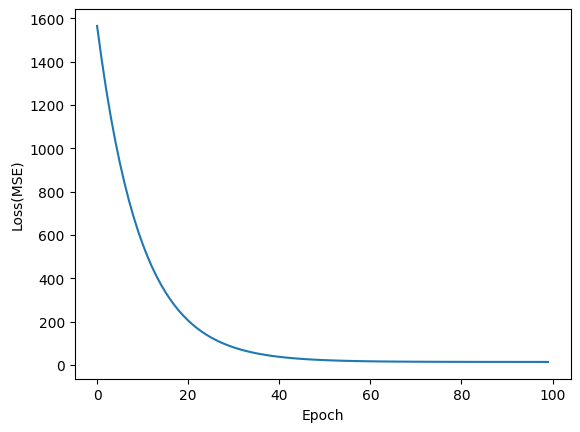

In [11]:
# 경사하강법의 반복횟수(Epoch)에 따른 손실을 출력합니다.
sns.lineplot(losses)
plt.gca().set_xlabel('Epoch')
plt.gca().set_ylabel('Loss(MSE)')
plt.show()

#### 규제(Regularization)

- 모수가 지나치게 커지지 않게 제약을 걸어 주는 방법

- 규제 방식

|   | 규제함수 |
| --- | --- |
| L1 규제<br/>(L1 Regularization) |$$\sum_{i=1}^k|\beta_i|$$|
| L2 규제<br/>(L2 Regularization) |$$\sum_{i=1}^k\beta_i^2$$|

- L1 규제 적용
> 손실함수에 규제 계수와 함께 가산
> 
> EX) $\text{Loss}=\sum_{i=1}^n(y_i-\hat{y}_i)^2$

- L1 규제 적용
$Loss = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{k} |\beta_i|$

- L2 규제 적용
$Loss = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{i=1}^{k} \beta_i^2$

#### L1 규제 vs L2 규제
- L1 규제: 모수를 0 으로 만들게 하는 성질이 강함
- L2 규제: 모수가 지나치게 커지지 않게 만들면서, 완전히 0 이 되지는 않게 함


|  | 단일 변수 규제함수 | 1차 도함수 |
|---|---|---|
| L1 규제<br>(L1 Regularization) | $$\|\beta_i\|$$ | $$\begin{cases} if\ \beta_i > 0, 1 \\ if\ \beta_i = 0, \text{미분불가} \\ if\ \beta_i < 0, -1 \end{cases}$$ |
| L2 규제<br>(L2 Regularization) | $$\beta_i^2$$ | $$\beta_i$$ |

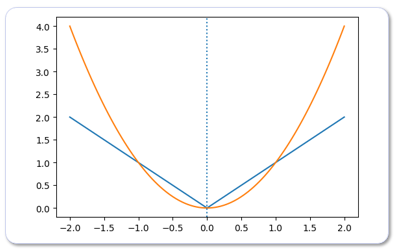

#### 규제가 적용된 선형회귀모델

|  | Ridge | Lasso | Elastic Net |
|---|---|---|---|
| 규제 | L2 규제 | L1 규제 | L1, L2 규제 |
| 손실 함수 | $$\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda\sum_{i=1}^{k}\beta_i^2$$|$$\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \alpha\sum_{i=1}^{k}\|\beta_i\|$$ |$$\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \alpha\sum_{i=1}^{k}\|\beta_i\| + \lambda\sum_{i=1}^{k}\beta_i^2$$|
| 수식 기반 추정 | $$(X^TX - \lambda I)^{-1}X^Ty$$ | 불가 | 불가 |
| 효과 | 안정화, 분산 감소, 다중공선성 완화 | 변수 선별 | Ridge + Lasso |

**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_abalone에서 성별(Sex)을 사전 순으로 첫 번째 범주인'F'를 제외하고 가변수화 합니다.

80%는 학습 데이터 df_train으로, 20%는 평가 데이터 df_test로 나눕니다.

Ridge 모델의 규제 계수(alpha)에 따라 df_train과 df_test에 대한 평균제곱오차(Mean Squared Error)를 비교해 봅니다.

```
alphas = [1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
```

</div>

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X_cols = [i for i in df_abalone.columns if i not in ['Rings']]
cont_val = [i for i in df_abalone.columns if i not in ['Sex', 'Rings']]

ct = ColumnTransformer([
    ('std', StandardScaler(), cont_val),
    ('ohe', OneHotEncoder(drop='first'), ['Sex'])
])

X_ct_name = [i + '_std' for i in cont_val] + ['Sex_I', 'Sex_M']

df_train, df_test = train_test_split(df_abalone,  train_size=0.8, random_state=123)

In [13]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
alphas = [1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
coefs, mse_train, mse_test = list(), list(), list()
for alpha in alphas:
    reg_rd = make_pipeline(ct, Ridge(alpha=alpha, random_state=123))
    reg_rd.fit(df_train[X_cols], df_train['Rings'])
    coefs.append(reg_rd[1].coef_)
    mse_train.append(mean_squared_error(df_train['Rings'], reg_rd.predict(df_train[X_cols])))
    mse_test.append(mean_squared_error(df_test['Rings'], reg_rd.predict(df_test[X_cols])))

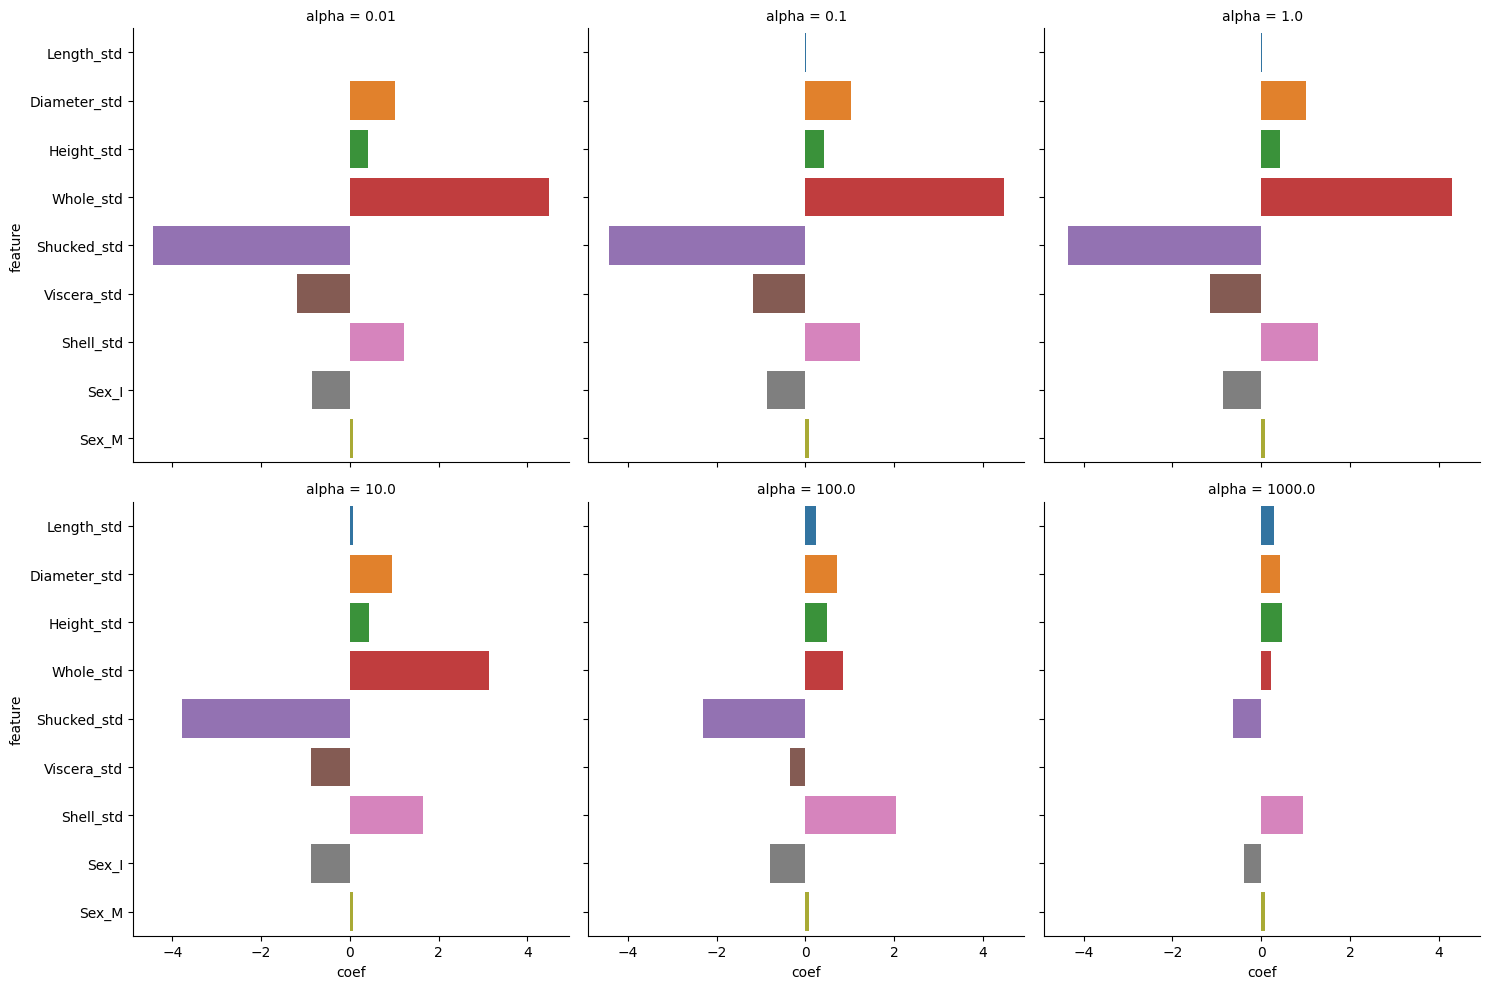

In [14]:
# 규제 계수별로 회귀 계수를 시각화합니다.
df_coef = pd.DataFrame(coefs, index=pd.Index(alphas, name='alpha'), columns=X_ct_name)\
        .reset_index().melt(id_vars='alpha', value_name='coef', var_name='feature')
sns.catplot(data=df_coef, y='feature', x='coef', col='alpha', col_wrap=3, kind='bar')
plt.show()

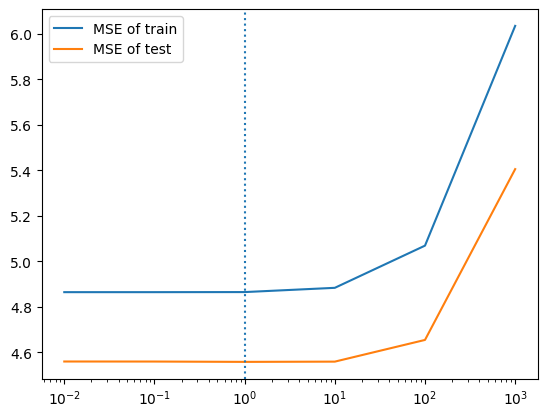

In [15]:
plt.gca().set(xscale='log')
sns.lineplot(x = alphas, y = mse_train, label='MSE of train')
sns.lineplot(x = alphas, y = mse_test, label='MSE of test')
plt.axvline(x = alphas[np.argmin(mse_test)], linestyle='dotted')
plt.legend()
plt.show()

**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex.2]에서 Ridge 모델대신 Elastic net 모델의 규제 계수(alpha)에 따라 df_train과 df_test에 대한 평균제곱오차(Mean Squared Error)를 비교해 봅니다.

이 때, l1_ratio는 0.5로 설정합니다.

```
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
```
    
</div>

In [16]:
from sklearn.linear_model import ElasticNet
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
coefs, mse_train, mse_test = list(), list(), list()
for alpha in alphas:
    reg_ls = make_pipeline(ct, ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=123))
    reg_ls.fit(df_abalone[X_cols], df_abalone['Rings'])
    coefs.append(reg_ls[1].coef_)
    mse_train.append(mean_squared_error(df_train['Rings'], reg_ls.predict(df_train[X_cols])))
    mse_test.append(mean_squared_error(df_test['Rings'], reg_ls.predict(df_test[X_cols])))
    
df_coef = pd.DataFrame(coefs, index=pd.Index(alphas, name='alpha'), columns=X_ct_name)\
        .reset_index().melt(id_vars='alpha', value_name='coef', var_name='feature')

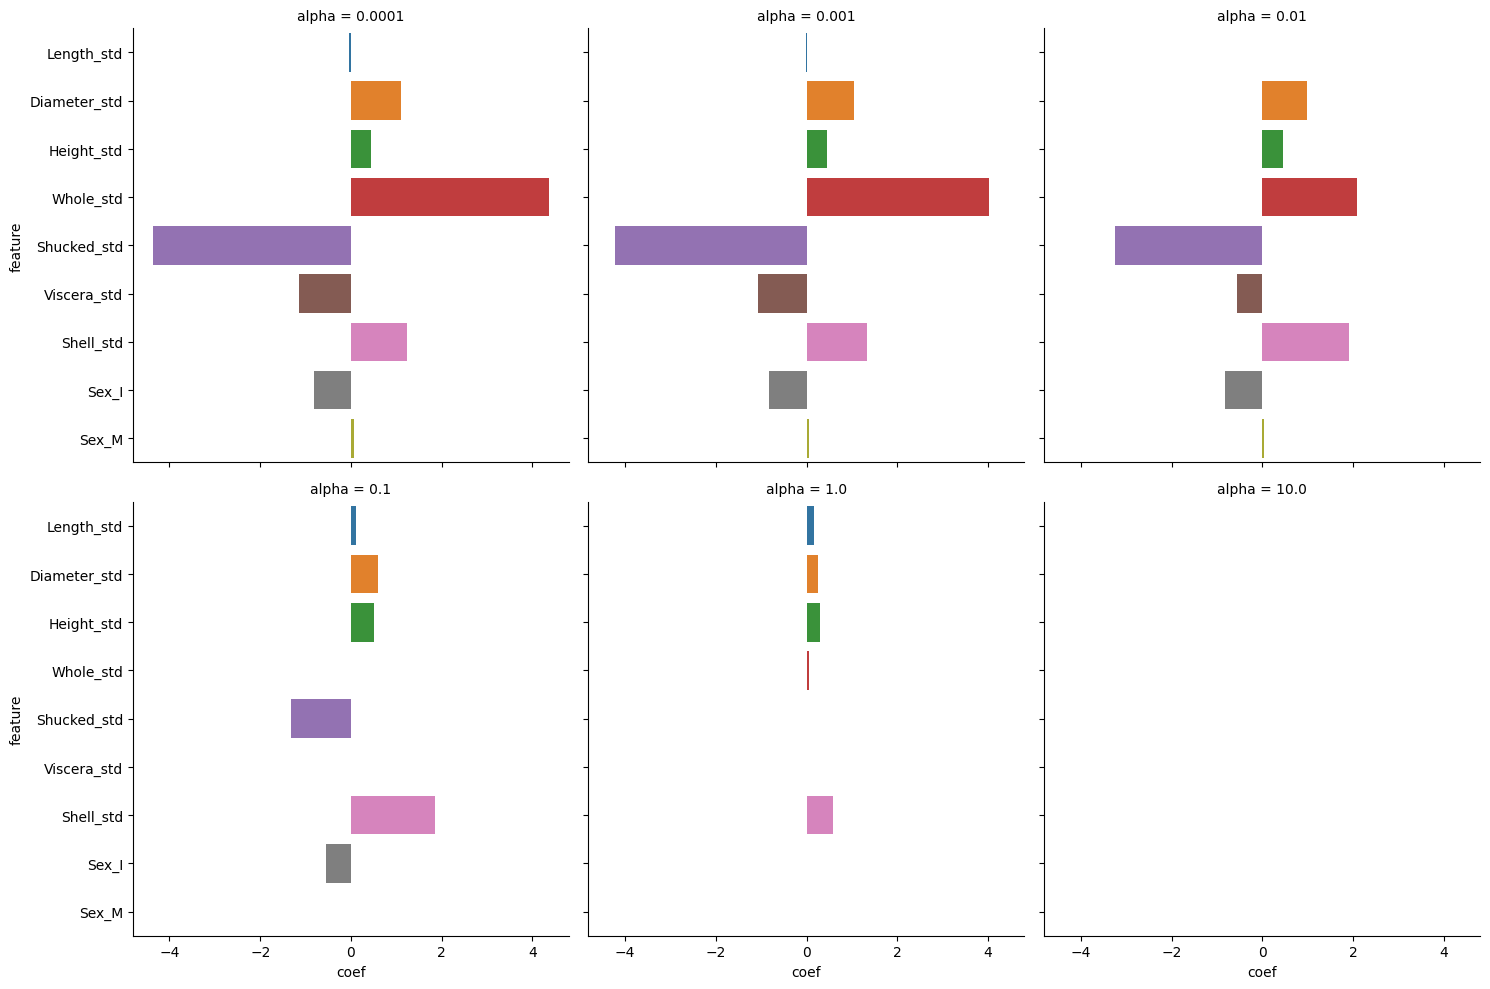

In [17]:
sns.catplot(data=df_coef, y='feature', x='coef', col='alpha', col_wrap=3, kind='bar')
plt.show()

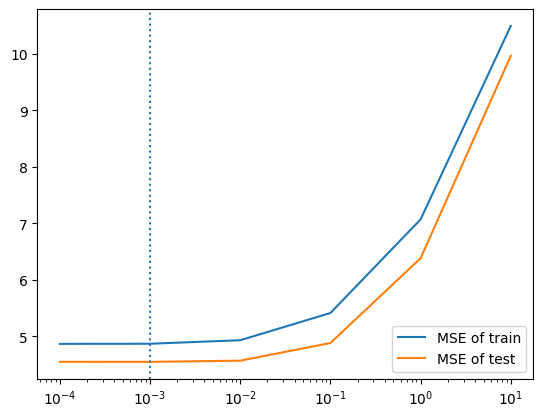

In [18]:
plt.gca().set(xscale='log')
sns.lineplot(x = alphas, y = mse_train, label='MSE of train')
sns.lineplot(x = alphas, y = mse_test, label='MSE of test')
plt.axvline(x = alphas[np.argmin(mse_test)], linestyle='dotted')
plt.legend()
plt.show()

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex.2]에서 Ridge 모델대신 Elastic net 모델의 규제 계수(alpha)에 따라 df_train과 df_test에 대한 평균제곱오차(Mean Squared Error)를 비교해 봅니다.

이 때, l1_ratio는 0.5로 설정합니다.

```
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
```
    
</div>

In [19]:
from sklearn.linear_model import ElasticNet
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
coefs, mse_train, mse_test = list(), list(), list()
for alpha in alphas:
    reg_ls = make_pipeline(ct, ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=123))
    reg_ls.fit(df_abalone[X_cols], df_abalone['Rings'])
    coefs.append(reg_ls[1].coef_)
    mse_train.append(mean_squared_error(df_train['Rings'], reg_ls.predict(df_train[X_cols])))
    mse_test.append(mean_squared_error(df_test['Rings'], reg_ls.predict(df_test[X_cols])))
    
df_coef = pd.DataFrame(coefs, index=pd.Index(alphas, name='alpha'), columns=X_ct_name)\
        .reset_index().melt(id_vars='alpha', value_name='coef', var_name='feature')

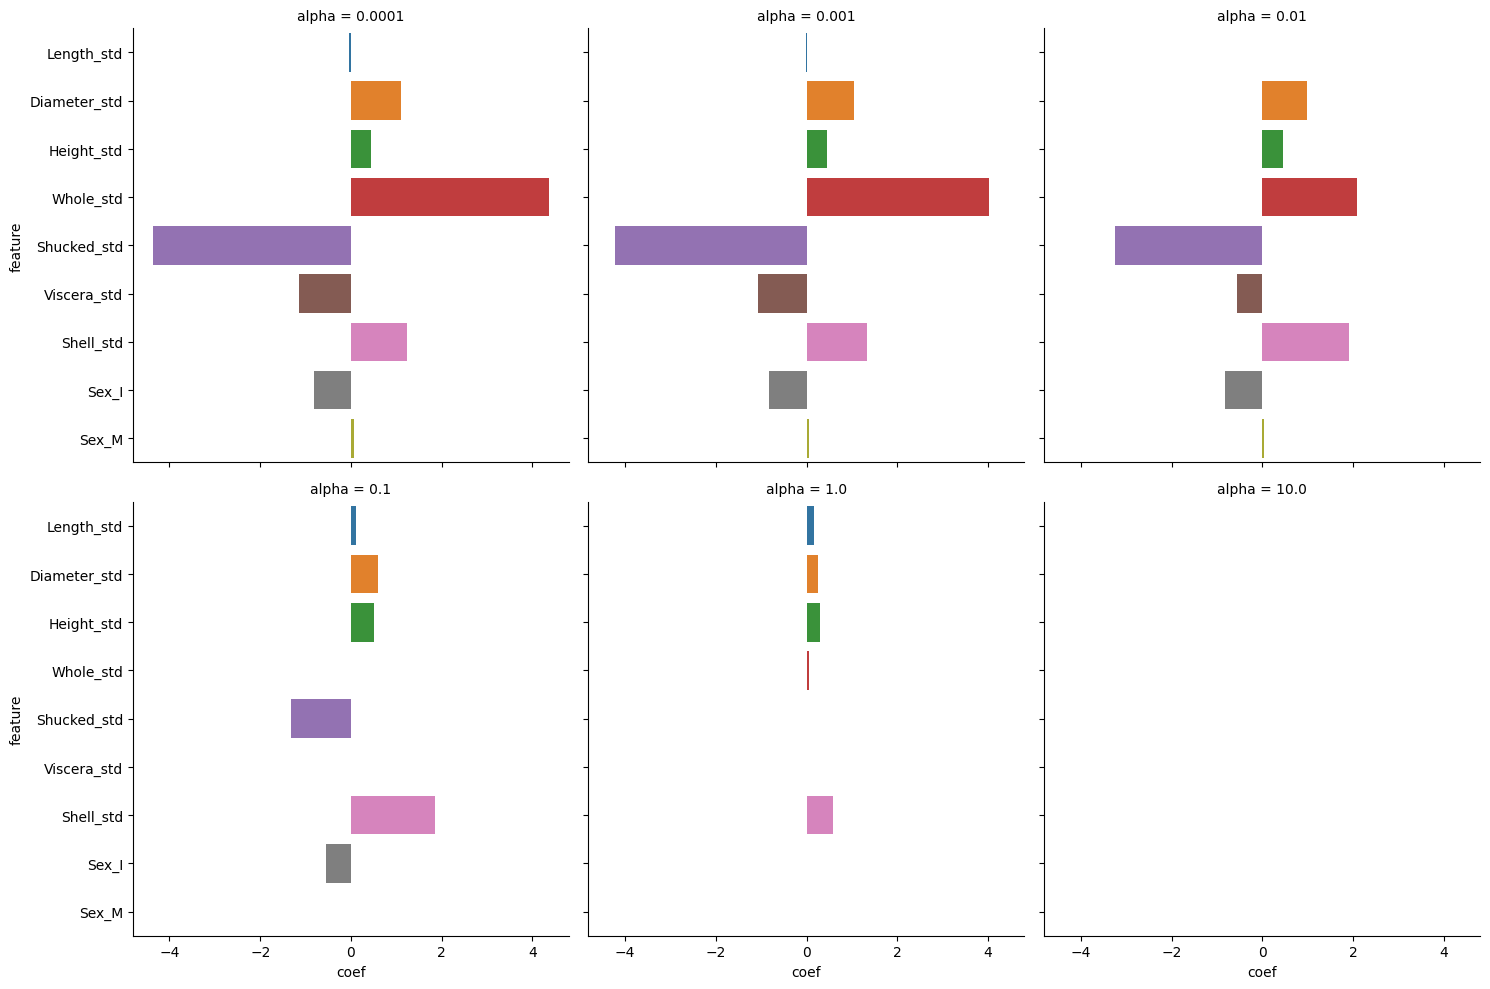

In [20]:
sns.catplot(data=df_coef, y='feature', x='coef', col='alpha', col_wrap=3, kind='bar')
plt.show()

#### 장단점
- 입력 변수와 출력 변수의 관계가 정의한 함수와 부합
> Yes: 높은 일반화 성능, 구조의 규칙성에 의해 효율적인 연산
> No: 일반화 성능 저하, 성능 향상을 위한 특성 엔지니어링 필요

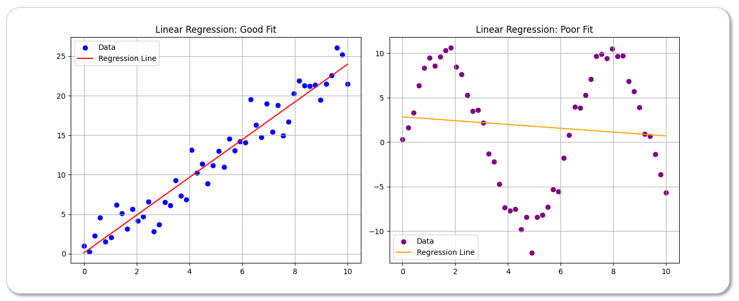

### 2. 나이브 베이즈(Naive Bayes)
- 나이브 베이즈
- 입력 변수들이 서로 독립(Independent)이라는 가정하에, 베이즈 정리를 활용해 사후 확률을 계산하고 이를 기반으로 분류하는 모델

$\hat{y} = \underset{c \in C}{\text{argmax}} \left( P(y) \prod_{i=1}^{n} P(X_i = x_i | y_i = c) \right)$

#### 나이브 베이즈(Naive Bayes) 유도과정

Bayes 룰, $P(y = c|X_1 = x_1, ..., X_k = x_k) = \frac{P(X_1 = x_1, ..., X_k = x_k|y = c)}{P(X_1 = x_1, ..., X_k = x_k)} P(y = c)$

입력 변수들이 독립이라는 가정, $P(X_1 = x_1, ..., X_k = x_k|y = c) = \prod_{i=1}^{n} P(X_i = x_i|y = c)$

$P(y = c|X_1 = x_1, ..., X_k = x_k) = \frac{\prod_{i=1}^{n} P(X_i = x_i|y = c)}{P(X_1 = x_1, ..., X_k = x_k)} P(y = c)$

$\hat{y} = \underset{c \in C}{\text{argmax}} \left( P(y = c) \prod_{i=1}^{n} P(X_i = x_i|y = c) \right)$

underflow에 대응, log를 취함 $\hat{y} = \underset{c \in C}{\text{argmax}} \left( \ln(P(y = c)) + \sum_{i=1}^{n} \ln(P(X_i = x_i|y = c)) \right)$

#### 종류

|   | 입력 변수 형태 | 조건부 확률의 분포 |
| --- | --- | --- |
| Bernoulli NB | 다수의 이진형 변수 | 베르누이 분포 |
| Multinomial NB | k 개 범주의 n 개의 시행에서의 빈도 | 다항 분포 |
| Gaussian NB | 연속형<br/>$X_i \sim N(\mu, \sigma^2)$가정 | 정규 분포 |

※ 다항분포 $P(X_1 = x_1, ..., X_k = x_k) = \frac{n!}{x_1! ... x_k!} p_1^{x_1} ... p_k^{x_k}$

$\mathbf{x} = [x_1, x_2, ..., x_k]$

k개의 사건 발생 빈도의 분포 $n = \sum_{i=1}^{k} x_i$

#### 학습


사전 확률 $P(y=c)$: $P(y = c) = \frac{\sum_{i=1}^{n} 1(y_i=c)}{n}$

조건부 확률

- y가 c인 데이터에서,

| | 확률질량(밀도)함수 | 조건부 확률의 분포 |
|---|---|---|
| Bernoulli NB<br>$$P(X_i = x_i \vert y = c)$$ | $$p^{x_i}(1-p)^{1-x_i}$$ | $$p = \frac{\sum_{i=1}^{n} x_i + \alpha}{n + 2\alpha}$$ |
| Multinomial NB<br>$$P(X_{i1} = x_{i1},...X_{ik} = x_{ik} \vert y = c)$$ | $$\frac{(\sum_{j=1}^{k} x_{ij})!}{x_{i1}! ... x_{ik}!} p_1^{x_{i1}} ... p_k^{x_{ik}}$$ | $$p_k = \frac{\sum_{i=1}^{n} x_{i1} + \alpha}{\sum_{i=1}^{n} \sum_{j=1}^{k} x_{ij} + k\alpha'}...$$ |
| Gaussian NB<br>$$P(X_i = x_i \vert y = c)$$ | $$\frac{1}{\sqrt{2\pi\sigma_i^2}} e^{-\frac{(x_i-\mu_i)^2}{2\sigma^2}}$$ | MLE 추정 : $$\mu_i = \frac{1}{n}\sum_{i=1}^{n} x_i$$ , $$\sigma_i^2 = \frac{1}{n}\sum_{i=1}^{n} \frac{(x_i-\mu_i)^2}{n}$$ |

#### 평활화(Smoothing)
- 미등장일 경우 클래스 확률이 0 이 되는 것을 방지
- 분산과 편향 조절



- α: 평활화 계수 (α=1 인 경우 Laplace Smoothing, α>0 인 경우 Lidstone Smoothing)

| α | 편향(Bias) | 분산(Variance) | 의미 |
| --- | --- | --- | --- |
| 작을수록(α→0) | 작아짐 | 커짐 | 데이터에 민감 |
| 클수록(α→1) | 커짐 | 작아짐 | 보수적 예측 |

**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_spam에서 메세지에서 대소문자 구별하지 않고(소문자 처리) 단어를 추출합니다. 

단어의 출현 빈도가 5 이상인 것만 남기고,

출현하는 단어를 $w_1, ... w_n$ 이라고 할 때, (n은 출현 단어의 수)

$P(w_i\text{ 등장}|target=ham), P(w_i\text{ 등장}|target=spam)$을 구합니다. 

> $P(w_i\text{ 등장}|target=ham) = \frac{\text{단어 }w_i\text{가 나오는 ham 문서의 수}}{\text{ham인 문서의 수}}$,
>  
> $P(w_i\text{ 등장}|target=spam) = \frac{\text{단어 }w_i\text{가 나오는 spam 문서의 수}}{\text{spam인 문서의 수}}$

미출현 단어에 의해 확률이 0이 되지 않도록 spam과 ham에서 모든 단어의 빈도에 0.1씩 더 해줍니다.

이와 함께, $P(target=ham), P(target=spam)$ 을 구해 봅니다.

> $P(target=ham) = \frac{\text{ham인 문서의 수}}{\text{전체 문서의 수}}$
>
> $P(target=spam) = \frac{\text{spam인 문서의 수}}{\text{전체 문서의 수}}$
    
</div>

In [21]:
# message Series를 
# 1. str.lower(): 소문자로 바꿉니다. 
# 2. a-z가 1회 이상 나오는 문자열들을 추출해냅니다,
# 3. 동일 SMS에서 중복된 출현한 단어들은 한 번씩남 남도록 합니다.
# 4. explode(): list의 내용들을 풀어서 하나의 Series로 전개합니다.
s_spam_words = df_spam['message'].str.lower()\
                        .str.findall('[a-z]{1,}')\
                        .apply(lambda x : list(np.unique(x)))\
                        .explode()
s_spam_words

0           amore
0       available
0          buffet
0           bugis
0            cine
          ...    
5571          its
5571         name
5571         rofl
5571           to
5571         true
Name: message, Length: 79161, dtype: object

In [22]:
# 단어 빈도를 구합니다.
s_word_cnt = s_spam_words.value_counts()
s_word_cnt

i                 2088
to                1687
you               1591
a                 1190
the               1037
                  ... 
heater               1
wifes                1
wasnt                1
braindance           1
kolathupalayam       1
Name: message, Length: 7785, dtype: int64

In [23]:
# 출현 빈도가 5개 이상인 단어만 선택합니다.
s_spam_words = s_spam_words.loc[s_spam_words.isin(s_word_cnt.loc[s_word_cnt >= 5].index)]
s_spam_words

0       available
0           bugis
0            cine
0           crazy
0               e
          ...    
5570         week
5571          its
5571         name
5571           to
5571         true
Name: message, Length: 69855, dtype: object

In [24]:
# 대상 변수의 빈도수를 구합니다.
s_target_cnt = df_spam['target'].value_counts()
s_target_cnt

ham     4825
spam     747
Name: target, dtype: int64

In [25]:
# 대상 변수의 출현 비율를 구합니다. (Prior)
s_target_prob = df_spam['target'].value_counts(normalize=True)
s_target_prob

ham     0.865937
spam    0.134063
Name: target, dtype: float64

In [26]:
# P(w_i|target=ham), P(w_i|target=spam)의 확률을 구합니다.

# ham과 spam별 단어 출현빈도를 구합니다.
# 빈도수가 없는 단어가 나오면 확률을 0으로 하면, 대상 변수를 분류하는데 유력한 단어가 나온다고 하더라도, 
# 빈도수가 없는 단어가 섞여 있으면 해당 클래스일 확률이 0이 됩니다.
# 이러한 문제를 완화하기 위해 빈도수가 없더라도 최소빈도수(0.1)를 넣어 줍니다.
# 전체합으로 나누어 ham, spam에 대한 조건부 확률로 만들어줍니다. 
# 이 때, 모든 단어 빈도에 더한 최소빈도수(0.1) 만큼을 df_target_cnt에 더하여 조건부 확률의 최대값이 1이 되도록합니다.

"""
# 아래와와 동일 루틴입니다.
df_word_prob = (
    pd.crosstab(index=[df_spam.loc[s_spam_words.index,'target']],columns=s_spam_words) + 0.1
).divide(s_target_cnt + 0.1, axis=0).T"""

df_word_prob = (s_spam_words.to_frame().groupby(
    df_spam.loc[s_spam_words.index, 'target']
)['message'].apply(lambda x: x.value_counts()).unstack().fillna(0).T + 0.1) / (s_target_cnt + 0.1)
df_word_prob.head()

target,ham,spam
a,0.183851,0.405702
aathi,0.001264,0.000134
abiola,0.002300,0.000134
able,0.005409,0.000134
about,0.029865,0.009503


**[Ex.6]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

단어의 출현 유무를 통해 spam/ham을 분류하는 나이브 베이즈를 이용하여 구하고자 합니다.
    
$x_i$를 SMS에 $w_i$가 등장하는 여부를 $C_j$ 를 SMS의 target이 ham/spam인 여부를 나타냅니다.
    
$\prod_{i=1}^{p}\left(P(x_i|C_j)\right)P(C_j)$  곱 연산은 곱의 수가 많아질 수록 floating point 표현 범위를 벗어날 가능성이 높습니다.

단조 증가 함수인 log를 사용을 하면 별다른 처리 없이 대소 관계를 비교할 수 있고, 
    
곱을 합으로 바꿀 수 있어, floating point 연산에 대한 안정성을 가져올 수 있습니다.
    
다음과 같이 log를 적용하여 아래의 판별함수 값을 target_ham, target_spam인 로그 확률을 만들어 봅니다.

<div style="padding: 5px; margin-left: 20px; margin-top: 10px">
$log(P(C_j|x_1,...,x_p)) \propto log(\prod_{i=1}^{p}\left(P(x_i|C_j)\right)P(C_j)) = \sum_{i=1}^plog(P(x_i|C_j)) + log(P(C_j))$
</div>

이를 기반으로 spam/ham 을 분류합니다.
</div>

In [27]:
# 문서별로 P(x_i|spam)P(spam) = 등장한 단어에서 spam일 로그 확률을 구합니다.
# 1. 문서에 등장한 단어를 spam 문서에 등장할 로그 확률로 바꿉니다.
# 2. 문서별로 확률의 합을 구합니다.
# 3. spam일 확률을 더합니다.
df_word_prob_log = np.log(df_word_prob)
s_spam_logprob = s_spam_words.map(df_word_prob_log['spam']).dropna().reset_index()\
            .groupby('index')['message'].sum() + \
            np.log(s_target_prob.loc['spam'])
s_spam_logprob

index
0       -90.732008
1       -35.419485
2       -70.843435
3       -44.802511
4       -69.673543
           ...    
5567    -65.807471
5568    -28.744702
5569    -34.698459
5570   -112.719810
5571    -15.994286
Name: message, Length: 5560, dtype: float64

In [28]:
# 문서별로 P(x_i|spam)P(ham) = 등장한 단어에서 ham일 로그 확률을 구합니다.
# 1. 문서에 등장한 단어를 ham 문서에 등장할 로그 확률로 바꿉니다.
# 2. 문서별로 확률의 합을 구합니다.
# 3. spam일 확률을 더합니다.
s_ham_logprob = s_spam_words.map(df_word_prob_log['ham']).dropna().reset_index()\
            .groupby('index')['message'].sum() + \
            np.log(s_target_prob.loc['ham'])
s_ham_logprob

index
0       -78.296232
1       -21.688316
2      -132.949220
3       -29.549207
4       -46.526959
           ...    
5567   -128.425125
5568    -21.004267
5569    -27.172805
5570    -87.335977
5571    -15.006446
Name: message, Length: 5560, dtype: float64

In [29]:
# spam일 확률과 ham일 확률을 비교하여 클래스 예측을 합니다.
# 5회 이상 출현하지 않아, 단어기반 확률을 구할 수 없는 경우는 빈도가 높은 'ham'으로 예측합니다.
df_spam_result = df_spam.assign(
    target_prd = pd.Series(np.where(s_spam_logprob > s_ham_logprob, 'spam', 'ham'), index=s_spam_logprob.index)
).fillna('ham')
# 오분류 데이터를 출력합니다.
df_spam_result.loc[
    df_spam_result['target'] != df_spam_result['target_prd']
]

,target,message,target_prd
45,ham,No calls..messages..missed calls,spam
68,spam,"Did you hear about the new ""Divorce Barbie""? I...",ham
69,ham,I plane to give on this month end.,spam
74,ham,U can call me now...,spam
180,ham,Hi! You just spoke to MANEESHA V. We'd like to...,spam
...,...,...,...
5157,ham,K k:) sms chat with me.,spam
5202,ham,WOT STUDENT DISCOUNT CAN U GET ON BOOKS?,spam
5315,ham,Hahaha..use your brain dear,spam
5475,ham,Dhoni have luck to win some big title.so we wi...,spam


In [30]:
# 예측 정확도 입니다.
np.mean(df_spam_result['target'] == df_spam_result['target_prd'])

0.9766690595836325

**[Ex.7]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_spam에서 80%를 학습 데이터 df_train으로 나머지 20%는 평가 데이터는 df_test로 나누어 봅니다. 

최소한 5건의 메세지에 등장한 단어의 빈도를 입력 변수(속성)으로 사용하여 target 변수를 예측하는 나이브 베이즈 모델을 만듭니다.

단어의 빈도 측정은 df_train을 대상으로 합니다.

이 때, 가법 평활 계수는 1로 합니다. 성능 측정 기준은 f1_score 입니다. Positive는 spam 클래스 입니다.
    
</div>

In [31]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_spam, train_size=0.8, random_state=123)

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

clf_nb = make_pipeline(
    CountVectorizer(lowercase=True, min_df=5),
    MultinomialNB(alpha=1)
)
clf_nb.fit(df_train['message'], df_train['target'])
(
    f1_score(df_test['target'], clf_nb.predict(df_test['message']), pos_label='spam'),
    f1_score(df_train['target'], clf_nb.predict(df_train['message']), pos_label='spam')
)

(0.9442622950819671, 0.957841483979764)

#### 장단점

| 장점 | 단점 |
| --- | --- |
| 빠른 학습과 예측<br/>적은 데이터로도 잘 작동<br/>고차원 데이터에 강함<br/>구현이 간단하고 직관적<br/>점진적 학습 가능<br/>특정 조건에서는 최적<br/>분류 기준 해석 용이| 독립성 가정에 어긋날수록 성능 저하의 여지가 큼<br/>모델의 유연성이 낮음<br/>연속형+범주형의 혼합이 어려움 |